# Notebook error process 

## Python built-in error types + library customized type of errors


### 1. GitHub

In [1]:
import pandas as pd
import util
import config

df2_err = pd.read_excel(config.path_github_error_process + '/nberror_g_all.xlsx')
df2_err["ename"] = df2_err.ename.str.lower()

In [2]:
df2_err

,fname,ename,evalue,traceback
0,00000-101-cookie-clicker-v2-checkpoint.ipynb,keyboardinterrupt,NaN,['\x1b[0;31m----------------------------------...
1,00000-1012-demand-forecasting-data-prep-from-s...,operationalerror,"FATAL: no pg_hba.conf entry for host ""75.166....",['\x1b[0;31m----------------------------------...
2,00000-1017-heatmapseq2seq.ipynb,valueerror,"x and y must have same first dimension, but ha...",['\x1b[0;31m----------------------------------...
3,00000-1023-crawler-20190515-20190516.ipynb,connectionerror,HTTPSConnectionPool(host='www.backpackers.com....,['\x1b[1;31m----------------------------------...
4,00000-1033-peer-solution-predicting-survival-t...,urlerror,<urlopen error [Errno 11001] getaddrinfo failed>,['\x1b[1;31m----------------------------------...
...,...,...,...,...
177253,00311-934-untitled.ipynb,syntaxerror,"invalid syntax (<unknown>, line 1)","['\x1b[0;36m File \x1b[0;32m""<unknown>""\x1b[0..."
177254,00311-934-untitled.ipynb,typeerror,'NoneType' object is not iterable,['\x1b[0;31m----------------------------------...
177255,00311-984-working-with-mask-during-horizontal-...,valueerror,Input matrix must have some non-missing values,['\x1b[0;31m----------------------------------...
177256,00311-987-titanic.ipynb,nameerror,ignored,['\x1b[0;31m----------------------------------...


In [3]:
df2_err.fname.nunique()

108925

In [4]:
df2_err.count()

fname        177258
ename        177113
evalue       158433
traceback    177258
dtype: int64

In [7]:
# import util

# exception_list = util.get_python_exception_names() # wrote to config
# len(exception_list)

66

In [5]:
import copy

df2_err_builtin_exps = df2_err[df2_err["ename"].isin(config.exception_list_python)]
df2_err_other_exps = copy.deepcopy(df2_err[~df2_err["ename"].isin(config.exception_list_python)])
print("{0:.2%} errors have {1} different exception names that are the same as Python built-in exceptions".format(len(df2_err_builtin_exps)/len(df2_err),
                                                                                                                len(df2_err_builtin_exps.ename.unique())
))
print("Other {0:.2%} errors ({1} samples) have {2} different exception names".format(len(df2_err_other_exps)/len(df2_err), 
                                                                                  len(df2_err_other_exps),
                                                                                  df2_err_other_exps["ename"].nunique()))


92.79% errors have 55 different exception names that are the same as Python built-in exceptions
Other 7.21% errors (12772 samples) have 1449 different exception names


<Axes: xlabel='ename_mapped'>

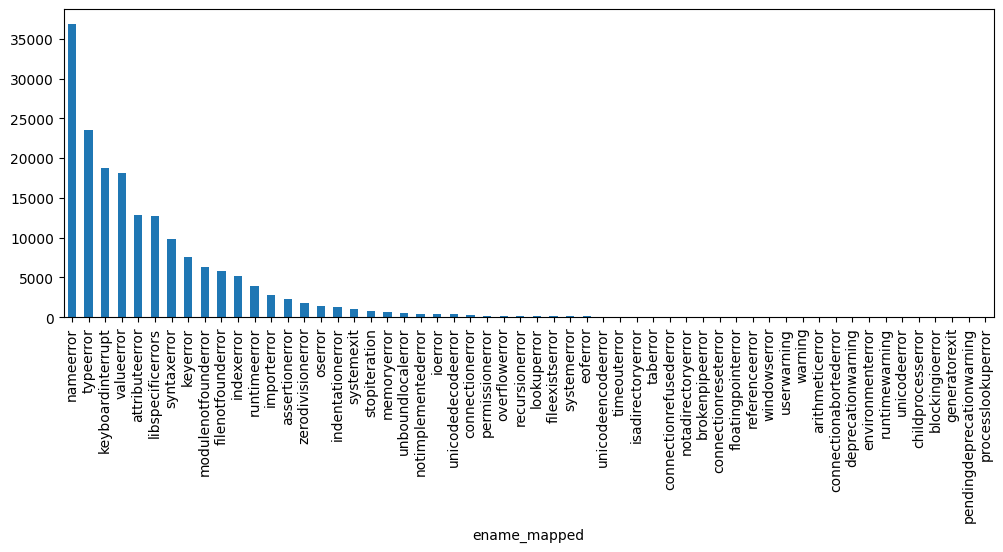

In [7]:
# we adress other exps as library custom exceptions (libspecificerrors)
df2_err["ename_mapped"] = df2_err["ename"]
df2_err.loc[(~df2_err["ename"].isin(config.exception_list_python)), "ename_mapped"] = "libspecificerrors"
df2_err.to_excel(config.path_github_error_process + '/nberror_g_all_p.xlsx', index=False, engine="xlsxwriter")

# plot exception type distribtion
df2_err["ename_mapped"].groupby([df2_err["ename_mapped"]]).count().sort_values(ascending=0).plot(kind="bar", figsize=(12,4))

<Axes: xlabel='ename'>

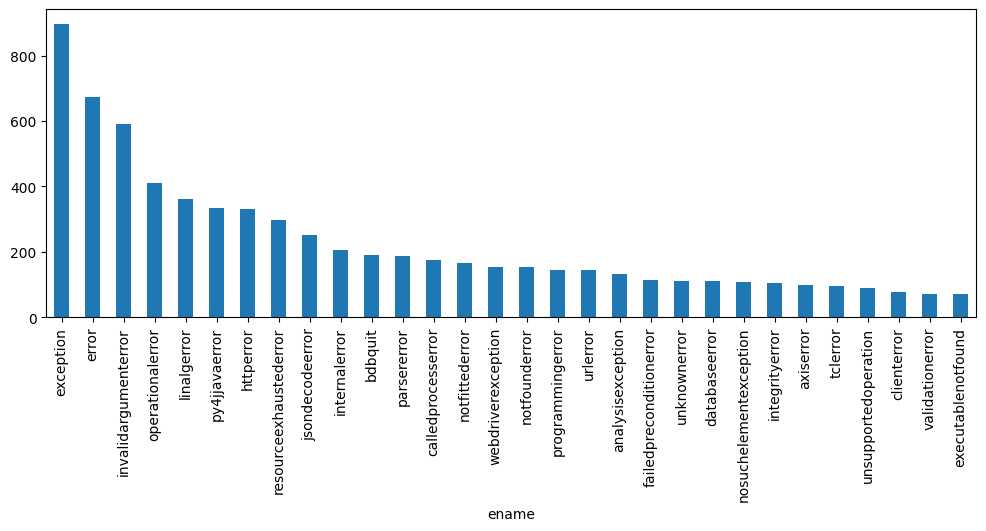

In [8]:
# plot within the library custom exceptions
df2_err_other_exps["ename"].groupby([df2_err_other_exps["ename"]]).count().sort_values(ascending=0)[:30].plot(kind="bar", figsize=(12,4))

In [36]:
import util

util.print_traceback(df2_err_other_exps.loc[df2_err_other_exps["ename"]=="error","traceback"][720])

---------------------------------------------------------------------------
error                                     Traceback (most recent call last)
<ipython-input-13-d0324d1b3e6c> in <module>()
      6 display_surf = pygame.display.set_mode((400,400))
      7 pygame.display.set_caption('hello world!')
----> 8 img = pygame.image.load('hh.png')
      9 x,y = 10,10
     10 FPS = 60

error: Couldn't open hh.png


### 2. nbs from kaggle


In [10]:
# read in all errors from the file
import pandas as pd
import config

path_err = config.path_kaggle_error_process + '/nberror_k.xlsx'

df_err = pd.read_excel(path_err)
df_err["ename"] = df_err.ename.str.lower()

df_err.head()

,fname,ename,evalue,traceback
0,aaronalbrecht_hardness-contest.ipynb,valueerror,The feature names should match those that were...,['\x1b[1;31m----------------------------------...
1,aaryaamoharir_resnet-50-my-version.ipynb,keyboardinterrupt,NaN,['\x1b[0;31m----------------------------------...
2,aaryaamoharir_resnet-50-version-2.ipynb,keyboardinterrupt,NaN,['\x1b[0;31m----------------------------------...
3,achintyabhat_activation-maximization.ipynb,typeerror,'AxesSubplot' object is not subscriptable,['\x1b[0;31m----------------------------------...
4,adityabajaj03_dr-cnn.ipynb,keyerror,'val_categorical_accuracy',['\x1b[0;31m----------------------------------...


In [11]:
df_err.fname.nunique()

4349

In [12]:
df_err.count()

fname        6776
ename        6772
evalue       5680
traceback    6776
dtype: int64

92.69% errors have 30 different exception names that are the same as Python built-in exceptions
Other 7.31% errors (495 samples) have 97 different exception names


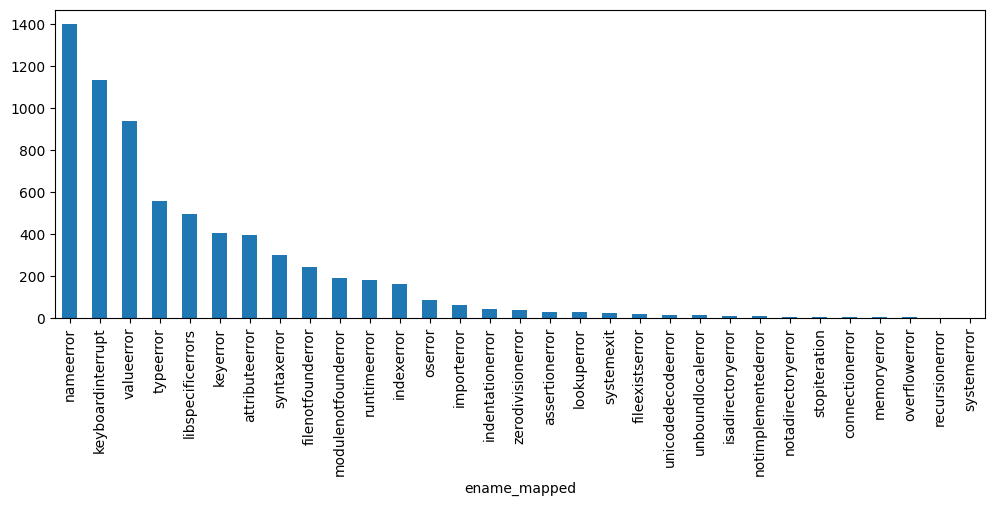

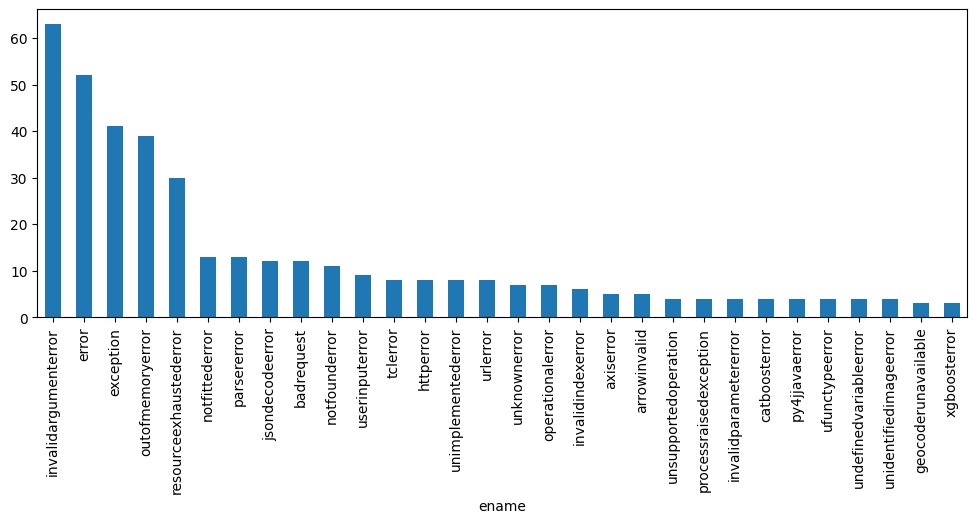

In [13]:
import util
import matplotlib.pyplot as plt
import copy

df_err_builtin_exps = df_err[df_err["ename"].isin(config.exception_list_python)]
df_err_other_exps = copy.deepcopy(df_err[~df_err["ename"].isin(config.exception_list_python)])
print("{0:.2%} errors have {1} different exception names that are the same as Python built-in exceptions".format(len(df_err_builtin_exps)/len(df_err),
                                                                                                                len(df_err_builtin_exps.ename.unique())
))
print("Other {0:.2%} errors ({1} samples) have {2} different exception names".format(len(df_err_other_exps)/len(df_err), 
                                                                                  len(df_err_other_exps),
                                                                                  df_err_other_exps["ename"].nunique()))

df_err["ename_mapped"] = df_err["ename"]
df_err.loc[(~df_err["ename"].isin(config.exception_list_python)), "ename_mapped"] = "libspecificerrors"
df_err.to_excel(config.path_kaggle_error_process + '/nberror_k_p.xlsx', index=False, engine="xlsxwriter")

# plot exception type distribtion
df_err["ename_mapped"].groupby([df_err["ename_mapped"]]).count().sort_values(ascending=0).plot(kind="bar", figsize=(12,4))
plt.show()

# plot within the library custom exceptions
df_err_other_exps["ename"].groupby([df_err_other_exps["ename"]]).count().sort_values(ascending=0)[:30].plot(kind="bar", figsize=(12,4))
plt.show()